# Final size comparisons

In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
from grab_data import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from grab_simulations import AvailableSims, available_r0s

mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['font.size'] = 6


In [3]:
DATASET = 'CENSUS_LAD11'
r0s_available = len(available_r0s)
total_pop = get_population_sizes(DATASET).sum()

## Calculate final size

In [4]:
def total_final_size_distribution(simulation):
    return 1 - simulation[:, -1].sum(axis=1) / total_pop

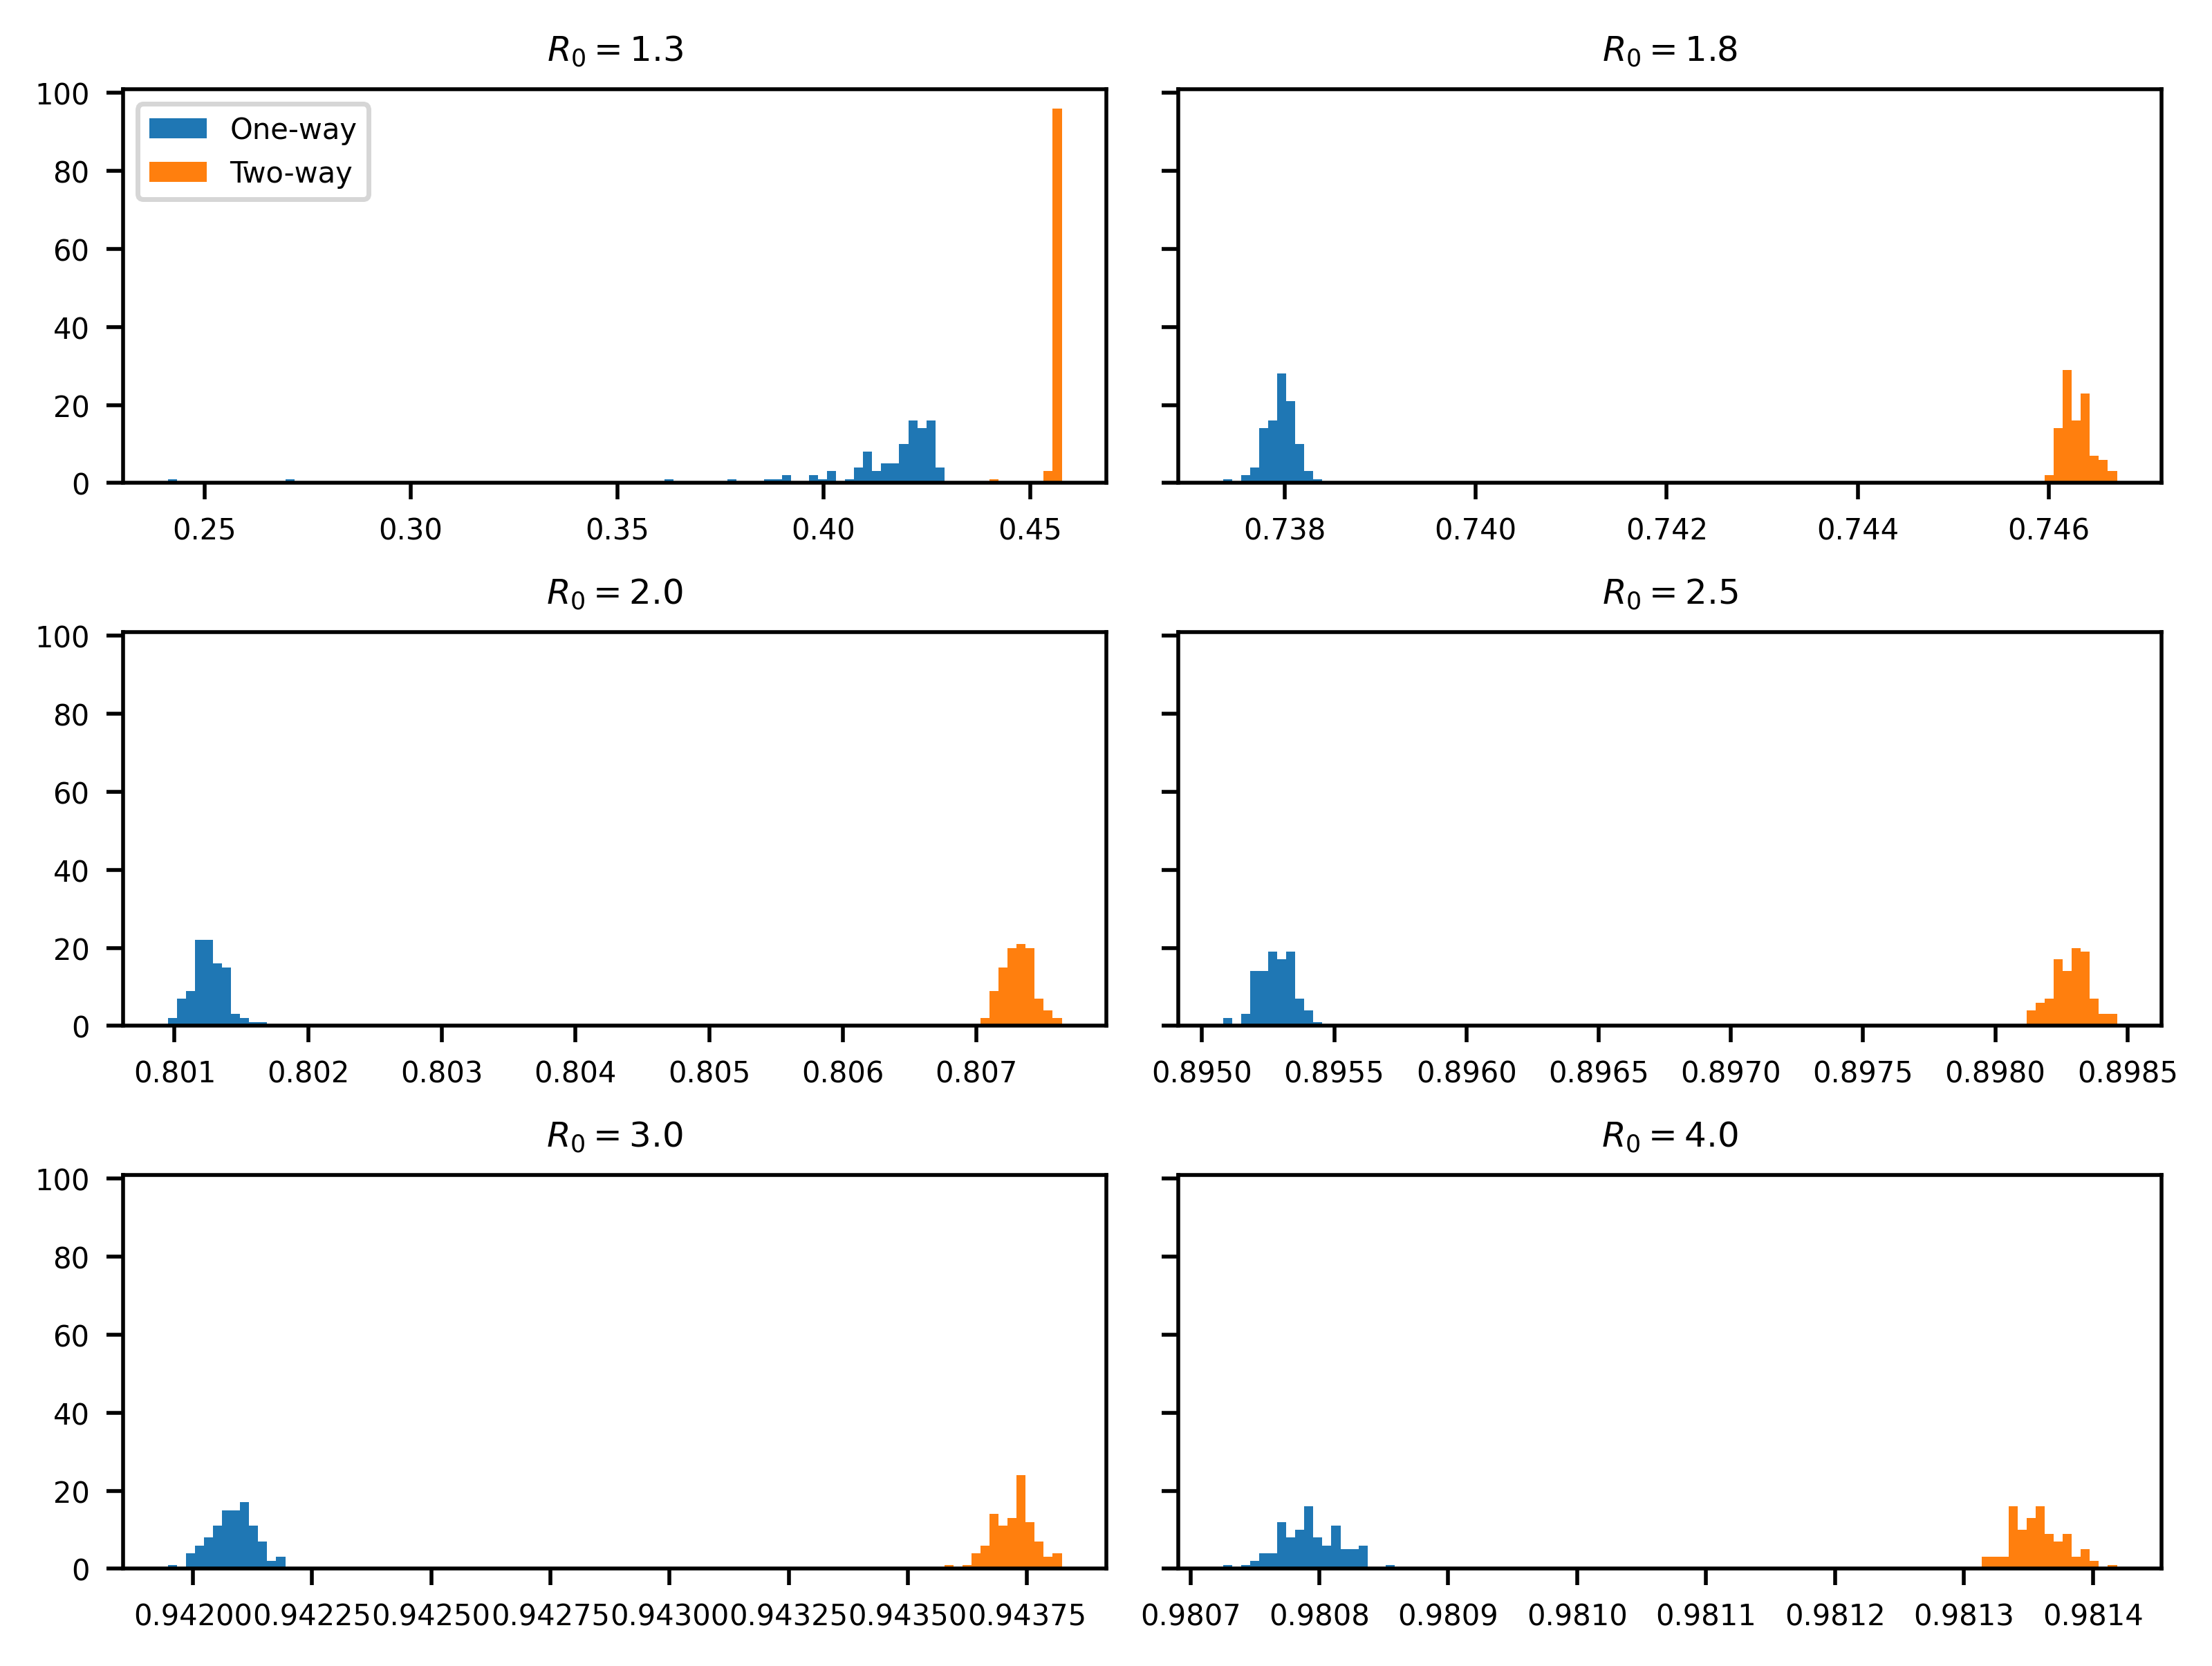

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharey=True)
time_range = np.linspace(0, 200, 200 * 12)
for sim in AvailableSims():
    one_way, two_way, r0, point = sim
    one_way_final_sizes = total_final_size_distribution(one_way[0])
    two_way_final_sizes = total_final_size_distribution(two_way[0])
    bins=np.linspace(min(one_way_final_sizes.min(),two_way_final_sizes.min()),max(one_way_final_sizes.max(),two_way_final_sizes.max()), 100)
    ax[point].hist(one_way_final_sizes, label='One-way', bins=bins)
    ax[point].hist(two_way_final_sizes, label='Two-way', bins=bins)
    ax[point].set_title(f'$R_0 = {r0}$')
ax[0,0].legend()
fig.tight_layout()
plt.show()